In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from pathlib import Path
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
data_file = Path(r"C:\Users\Lenovo\Downloads\heart+disease\processed.cleveland.data")

cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(data_file, header=None, names=cols, na_values='?')
print("Loaded:", data_file)
print("Shape:", df.shape)
print(df.head())



Loaded: C:\Users\Lenovo\Downloads\heart+disease\processed.cleveland.data
Shape: (303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [22]:
df['ca'].fillna(df['ca'].median(),inplace=True)
df['thal'].fillna(df['thal'].median(),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_62244\3425088811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_62244\3425088811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

categorical_cols = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Final dataset shape:", df_encoded.shape)
df_encoded.head()


Final dataset shape: (303, 21)


,age,trestbps,chol,thalach,oldpeak,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


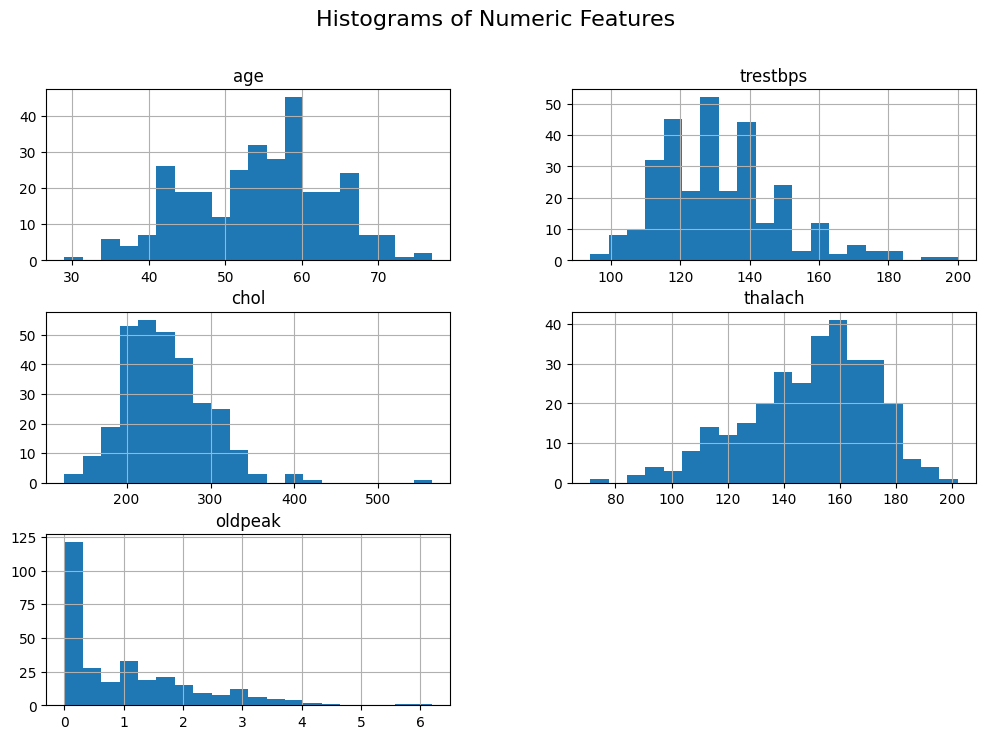

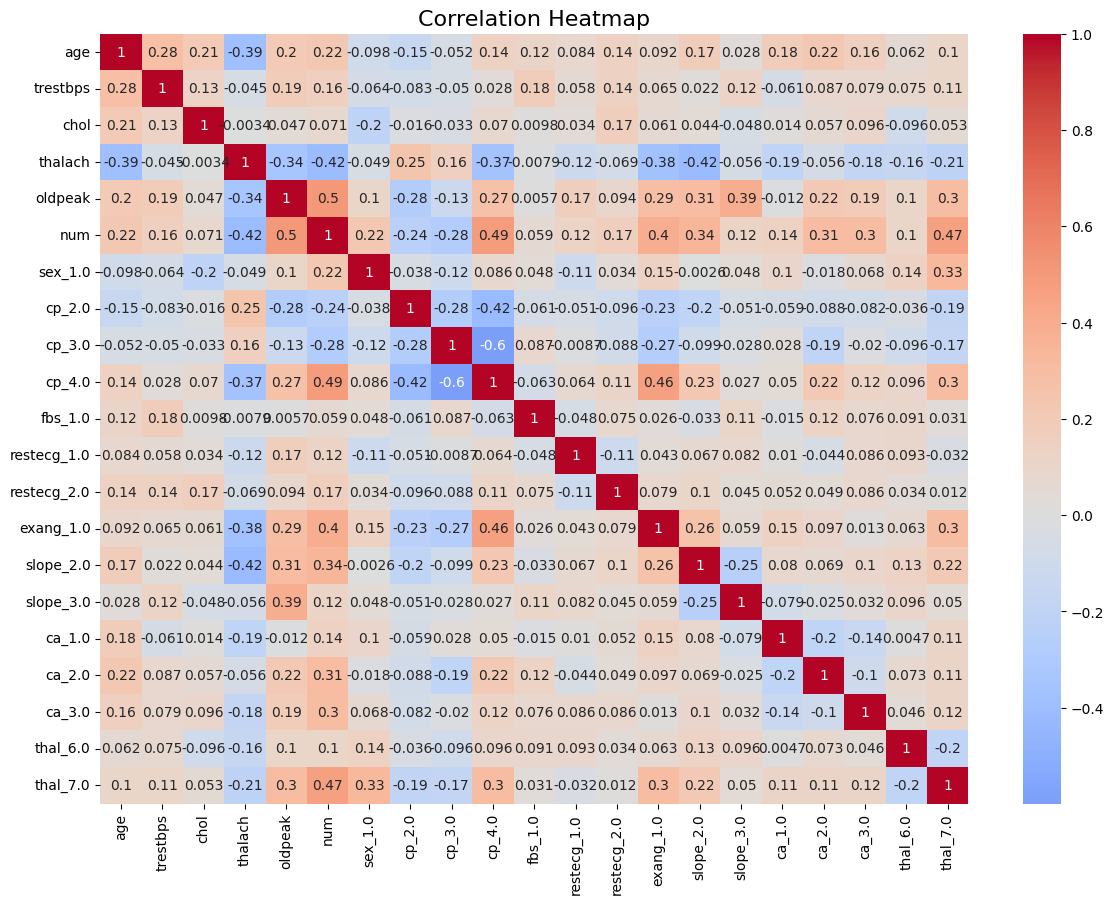

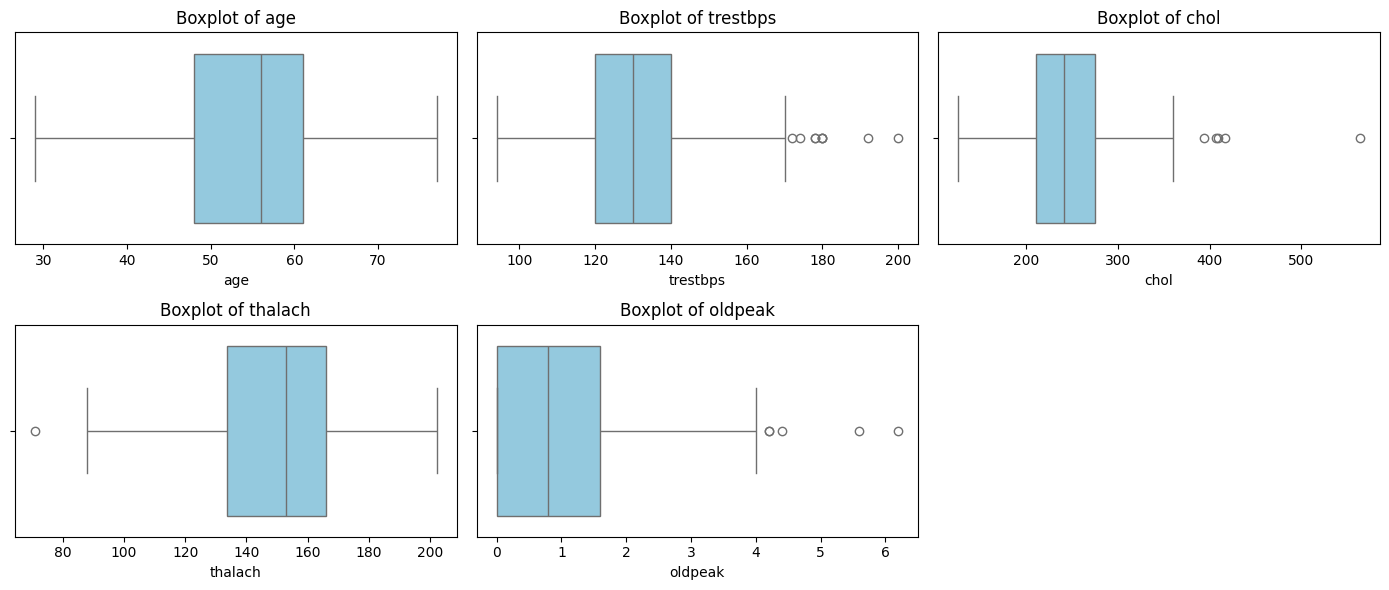

In [30]:
# 1. Histograms of numeric features
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# 2. Correlation heatmap (using encoded dataset)
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0, cbar=True,annot=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 3. Boxplots for numeric features
plt.figure(figsize=(14,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [33]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        after = df_clean.shape[0]
        print(f"{col}: removed {before - after} outliers")
    return df_clean

# Apply to numeric features
numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print("\nOriginal shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)


age: removed 0 outliers
trestbps: removed 9 outliers
chol: removed 5 outliers
thalach: removed 1 outliers
oldpeak: removed 4 outliers

Original shape: (303, 14)
After outlier removal: (284, 14)


Number of components to retain 95% variance: 13


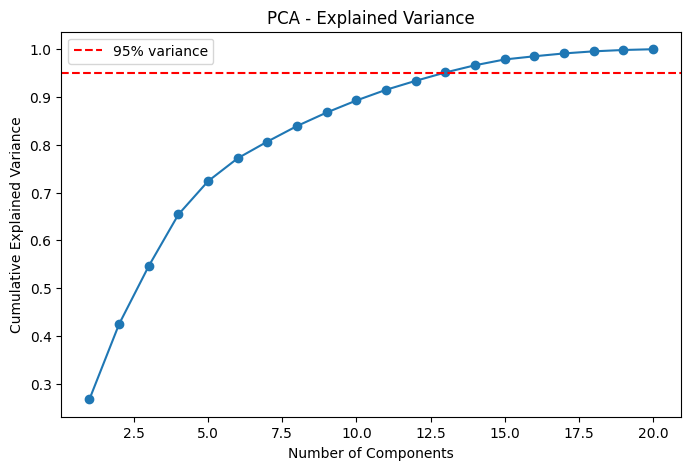

Original shape: (303, 20)
Reduced shape: (303, 13)


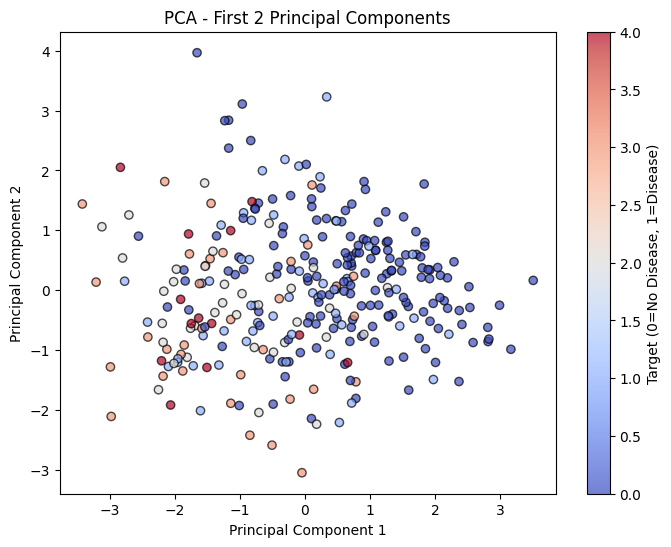

In [39]:
X = df_encoded.drop(columns=["num"])
y = df_encoded["num"]

pca = PCA().fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)

n95 = np.argmax(cum_var >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n95}")


plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label="95% variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.legend()
plt.show()


pca = PCA(n_components=n95)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First 2 Principal Components")
plt.colorbar(label="Target (0=No Disease, 1=Disease)")
plt.show()


Top 10 important features:
thalach      0.143540
oldpeak      0.118680
age          0.111595
chol         0.108637
trestbps     0.096614
cp_4.0       0.063153
thal_7.0     0.062737
exang_1.0    0.048585
slope_2.0    0.035099
ca_1.0       0.035033
dtype: float64


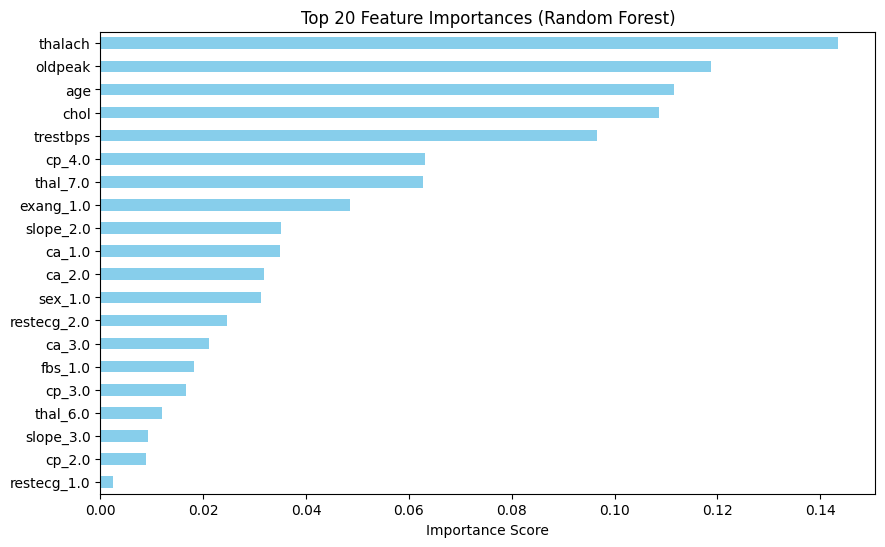

In [41]:
X = df_encoded.drop(columns=["num"])
y = df_encoded["num"]

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Top 10 important features:")
print(feat_imp.head(10))

plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X, y)

rfe_features = pd.Series(rfe.support_, index=X.columns)
selected_rfe = rfe_features[rfe_features == True].index.tolist()

print("Top 10 features selected by RFE:")
print(selected_rfe)

['oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raise

In [46]:
scaler = MinMaxScaler()
X_chi = scaler.fit_transform(X)

chi_selector = SelectKBest(score_func=chi2, k=10)
chi_selector.fit(X_chi, y)

chi_scores = pd.Series(chi_selector.scores_, index=X.columns).sort_values(ascending=False)

print("Top 10 features by Chi-Square test:")
print(chi_scores.head(10))

Top 10 features by Chi-Square test:
thal_7.0     46.721875
cp_4.0       45.129615
exang_1.0    41.534482
ca_2.0       34.648382
ca_3.0       29.999871
slope_2.0    22.408432
cp_3.0       21.974965
cp_2.0       16.942450
oldpeak      16.451213
ca_1.0       15.262296
dtype: float64


In [47]:
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_top = rf_importances.head(12).index.tolist()   

selected_rfe = rfe_features[rfe_features == True].index.tolist()


chi_scores = pd.Series(chi_selector.scores_, index=X.columns).sort_values(ascending=False)
chi_top = chi_scores.head(12).index.tolist()


all_selected = set(rf_top) | set(selected_rfe) | set(chi_top)
final_features = [feat for feat in all_selected if (
    (feat in rf_top) + (feat in selected_rfe) + (feat in chi_top)
) >= 2]

print("Final selected features for modeling:")
print(final_features)

X_selected = X[final_features]
print("\nOriginal shape:", X.shape)
print("Reduced shape (after feature selection):", X_selected.shape)

Final selected features for modeling:
['ca_3.0', 'cp_2.0', 'exang_1.0', 'cp_4.0', 'thal_6.0', 'oldpeak', 'ca_1.0', 'slope_2.0', 'thal_7.0', 'sex_1.0', 'ca_2.0', 'cp_3.0']

Original shape: (303, 20)
Reduced shape (after feature selection): (303, 12)


In [52]:
y = df_encoded["num"].apply(lambda x: 1 if x > 0 else 0)

print("Class distribution:")
print(y.value_counts())


Class distribution:
num
0    164
1    139
Name: count, dtype: int64


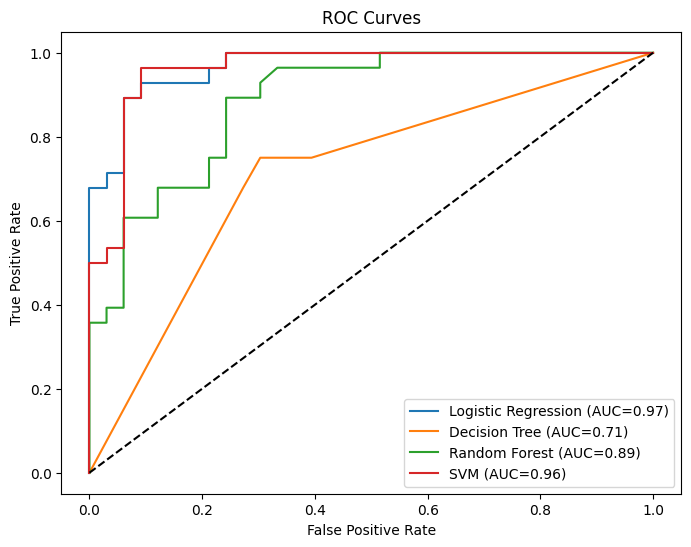

                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.901639   0.866667  0.928571  0.896552  0.968615
Decision Tree        0.704918   0.678571  0.678571  0.678571  0.712662
Random Forest        0.754098   0.724138  0.750000  0.736842  0.886905
SVM                  0.918033   0.896552  0.928571  0.912281  0.962121


In [53]:
X = df_encoded.drop(columns=["num"])
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, kernel="rbf", random_state=42)
}

results = {}

plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results[name] = [acc, prec, rec, f1, auc]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-score","ROC AUC"]).T
print(results_df)

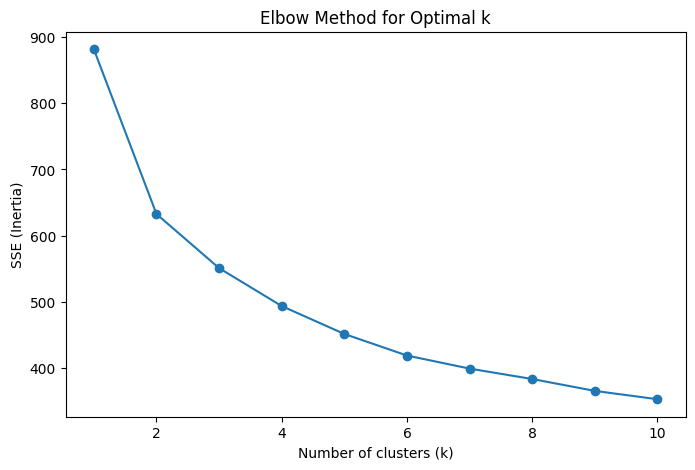

Cluster,0,1
Actual,,
0,16,148
1,86,53


In [55]:
X_cluster = X_selected  

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, sse, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_cluster)

pd.crosstab(y, clusters_kmeans, rownames=["Actual"], colnames=["Cluster"])


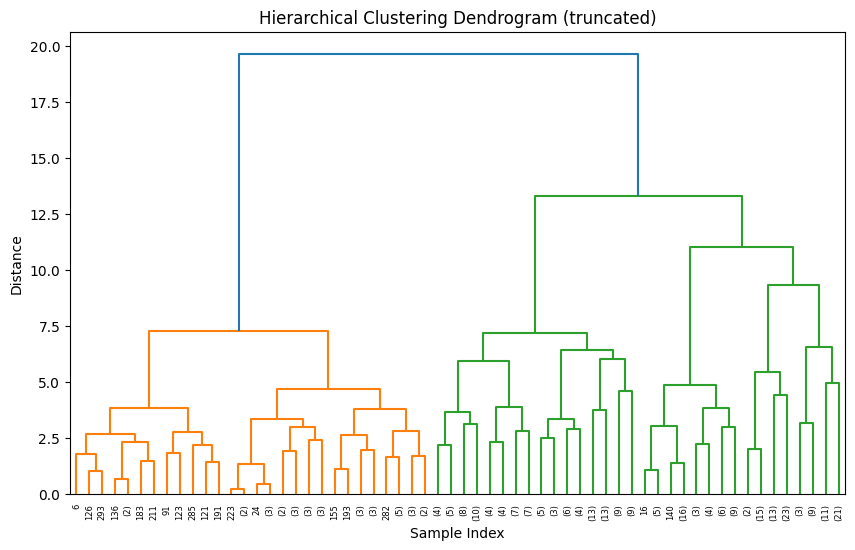

Cluster,1,2
Actual,,
0,3,161
1,47,92


In [57]:
Z = linkage(X_cluster, method="ward")

plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


clusters_hc = fcluster(Z, 2, criterion="maxclust")
pd.crosstab(y, clusters_hc, rownames=["Actual"], colnames=["Cluster"])

In [59]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="roc_auc", n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression AUC:", grid_lr.best_score_)

svm = SVC(probability=True, kernel="rbf", random_state=42)

param_dist_svm = {
    "C": [0.01, 0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1]
}

rand_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, 
                              n_iter=10, cv=5, scoring="roc_auc", n_jobs=-1, random_state=42)
rand_svm.fit(X_train, y_train)

print("Best SVM Params:", rand_svm.best_params_)
print("Best SVM AUC:", rand_svm.best_score_)


Best Logistic Regression Params: {'C': 10, 'penalty': 'l1'}
Best Logistic Regression AUC: 0.9041684965598009
Best SVM Params: {'gamma': 0.01, 'C': 100}
Best SVM AUC: 0.8976445052532009


In [60]:
best_lr = grid_lr.best_estimator_
best_svm = rand_svm.best_estimator_

for name, model in {"Tuned Logistic Regression": best_lr, "Tuned SVM": best_svm}.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Performance on Test Set:")
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, ROC AUC: {auc:.3f}")


Tuned Logistic Regression Performance on Test Set:
Accuracy: 0.902, Precision: 0.867, Recall: 0.929, F1: 0.897, ROC AUC: 0.953

Tuned SVM Performance on Test Set:
Accuracy: 0.869, Precision: 0.857, Recall: 0.857, F1: 0.857, ROC AUC: 0.945


In [63]:
loaded_model = joblib.load("final_model.pkl")
preds = loaded_model.predict(X_selected[:5])
print(preds)

[0 1 1 0 0]
